# Part II - (Prosper Loan)
## by (Fridah Arasa)

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')

# Due to the large number of the variables in the dataframe, a few that will be used in the analysis will be selected.
prosperloan = prosper[['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerRate', 'Occupation', 'EmploymentStatus', 'IncomeRange', 'LoanOriginalAmount', 'IsBorrowerHomeowner', 'CurrentlyInGroup', 'Investors', 'InvestmentFromFriendsAmount', 'MonthlyLoanPayment', 'GroupKey', 'LoanKey', 'MemberKey', 'IncomeVerifiable']]

## (Visualization 1: Homeownership status of the borrowers at the time of borrowing.)
##### It's clear that majority of the borrowers were homeowners at the time. The percaentage number of homeowners was 50.4% and that of non-homeowners was 49.6%.

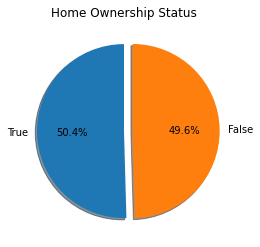

In [17]:
# Investigating the home ownership status duration among the borrowers at that particular time.
def counts(col):     #Creating the counts function to be used.
    values = col.value_counts()
    return values 

home_status = counts(prosperloan['IsBorrowerHomeowner']); # Exploring the home ownership status of the borrowers.
home_status 

def pie(values, title):    # Creating the pie function to be used in the subsequent questions.
    labels = ['True','False']
    explode = (0,0.1)
    fig1, ax1 = plt.subplots()
    ax1.pie(values, explode = explode, labels=labels,autopct = '%1.1f%%',shadow=True, startangle=90)
    plt.title(title); 
pie(home_status,'Home Ownership Status') 

## (Visualization 2: Relationship between the Original loan amount and the term of the loan.)
##### The relationship between the original loan amount and the loan term is positive. This means that as the original loan amount increases the loan term also does the same.

In [22]:
def regplot(df, xlabel,ylabel,title,x_jitter, scatter_kws):
    sb.regplot(data=df, x=xlabel, y=ylabel,x_jitter=x_jitter, scatter_kws= scatter_kws);
    plt.title(title);
    plt.xlabel(xlabel);
    plt.ylabel(ylabel);
    base_color=sb.color_palette()[0]

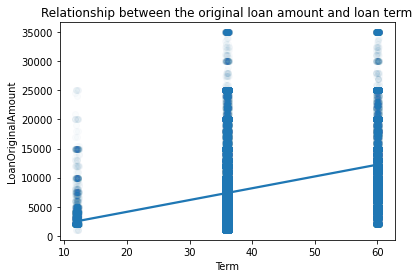

In [23]:
# Investigating the relationship between the original loan amount and the term length of the loan.
# Applying jitter and transparency.
regplot(prosperloan,'Term','LoanOriginalAmount','Relationship between the original loan amount and loan term',0.3,{'alpha':1/50})

## (Visualization 3:Relationship between borrower rate and original loan amount )
##### There is a negative correlationship between the borrower rate and the orignal loan amount. This means that as the borrower rate increases, the original loan amount decreases.


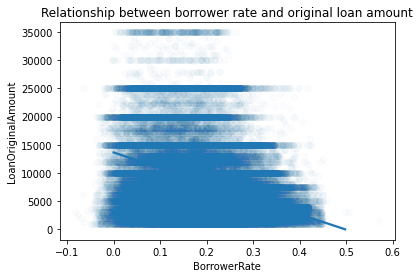

In [24]:
regplot(prosperloan,'BorrowerRate','LoanOriginalAmount','Relationship between borrower rate and original loan amount',0.1,{'alpha':1/50})

## (Visualization 4: Relationship between different variables.)
##### There is a positive correlationship between the investors, investment from friends, term, loan original amount and monthly loan payment. However there is a negative correlationship between monthly loan payment, loan original amount, investment from friends amount and borrower rate.There is a strong correlationship between loan original amount and monthly loan payment of 0.93. This indicates that the loan original amount influences the monthly loan that will be repaid.

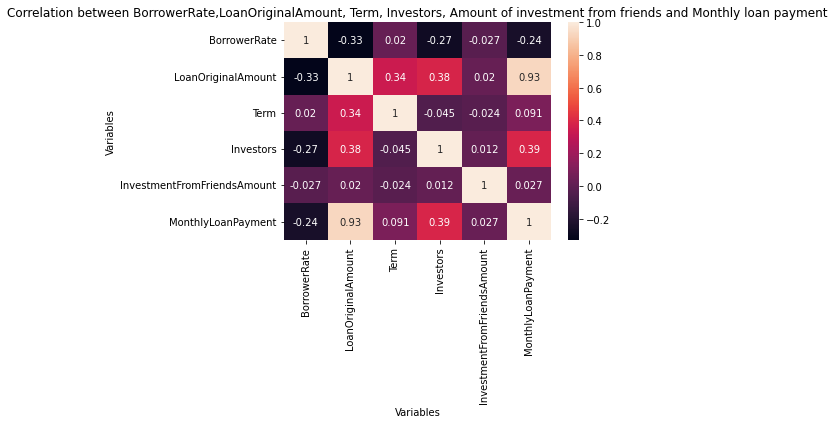

In [19]:
# Investigating the relationship between the variables listed below.
df = prosperloan[['BorrowerRate', 'LoanOriginalAmount', 'Term','Investors','InvestmentFromFriendsAmount','MonthlyLoanPayment']] 
# Finding the relationship between these variables.
corr_matrix = df.corr()
corr_matrix

# Plotting the relationship between the variables listed above.
sb.heatmap(corr_matrix, annot= True )
plt.title('Correlation between BorrowerRate,LoanOriginalAmount, Term, Investors, Amount of investment from friends and Monthly loan payment');
plt.xlabel('Variables');
plt.ylabel('Variables');